In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats

# Метод максимальної правдоподібності.

Нехай в нас є випадкова величина із ймовірнісним розподілом $\xi \sim p(x, \overrightarrow{\theta})$ , де p - щільність розподілу, $\overrightarrow{\theta}$ - невідомі параметри розподілу

Наприклад, $$\overrightarrow{\theta} = (a, \sigma^2)$$ 

$$ p(x, a, \sigma^2) = \cfrac {1}{\sqrt{2 \pi \sigma^2}} \exp(\cfrac{-(x-a)^2}{2\sigma^2}) $$ для нормального розподілу

Маємо вибірку із цього розподілу $ (x_1, x_2, ... x_k)  $ , але не знаємо значень параметрів $ (a, \sigma^2) $

In [9]:
a = 0 #mean
#sigma - unknown

sample = np.random.normal(loc = a, size = 100)
sample

array([ 0.20913641, -0.93698653,  0.40005599, -1.09246499, -1.85242231,
       -1.19957139,  0.27827309,  0.93040736,  2.83807646, -0.94823325,
        0.34310226,  2.42240695,  1.27521869,  0.21213446,  1.91553997,
        0.51731272,  0.59866954,  1.2769206 , -1.98533006,  0.07542717,
       -2.71619191, -1.53604569,  0.14359015,  0.62233523,  0.12527234,
        2.21596676, -1.33994923, -0.72689098,  1.9717421 ,  2.13299078,
        0.98422823,  0.34208264, -0.81391616,  1.16544224,  0.6674737 ,
       -0.05826633, -0.44040193,  0.55210087, -1.109775  , -2.34137752,
        0.78844668,  0.19733381, -0.5172629 , -0.06641757, -0.24058458,
        1.32001006,  0.018403  , -1.59623551, -0.23387533, -0.81163529,
       -0.2829652 ,  0.92229724, -0.83935197,  1.07447371,  0.07864962,
       -1.45693329,  0.16178647, -0.8711702 , -0.14163972,  1.00485039,
       -1.29097177, -1.7505927 , -0.64587175, -0.98458185,  0.50628604,
       -0.7711195 , -0.81479527,  0.18647207,  0.75648064, -0.76

За вибіркою можна ввести функцію правдоподібності, яка означатиме ймовірність, що вибірка отримана із даного розподілу:

$$ Likelihood(x_1, x_2, ... , x_k, \overrightarrow{\theta} ) = \prod_{i=1}^{k} p(x_i, \overrightarrow{\theta}) $$

або ще часто беруть її логарифм, для того щоб перетворити добуток на суму

$$ logLikelihood(x_1, x_2, ... , x_k, \overrightarrow{\theta} ) = \sum_{i=1}^{k} log p(x_i, \overrightarrow{\theta}) $$

Ідея методу максимальної правдоподібності полягає у тому, щоб привести функцію правдоподібності до максимуму і знайти параметри розподілу, які дають максимум функції правдоподібності:

$$ \prod_{i=1}^{k} p(x_i, \overrightarrow{\theta}) \rightarrow max_{\theta} $$

Або, що те ж саме, дають максимум логарифму правдоподібності:

$$ \sum_{i=1}^{k} log p(x_i, \overrightarrow{\theta}) \rightarrow max_{\theta} $$

Покажемо як змінюється правдоподібність залежно від невідомого параметра, підрахуємо правдоподібність залежно від різних сігма

In [10]:
#stats.norm.pdf - щільність нормального розподілу

sigma_arr = np.arange(0.5, 2.0, 0.1) #для графіку, побудуємо логарифм правдоподібності при різних sigma
sigma_arr

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9])

In [11]:
def log_likelihood_normal(sample, a, sigma):
    result = 0
    for x in sample:
        result += np.log(stats.norm.pdf(x, loc = a, scale = sigma))
    return result

likelihood_arr = [log_likelihood_normal(sample, a=a, sigma = val) for val in sigma_arr]

Інтуїтивно за графіком можна визначити, що максимум правдоподібності приблизно при $\sigma = 0.9$ або $\sigma = 1.0$

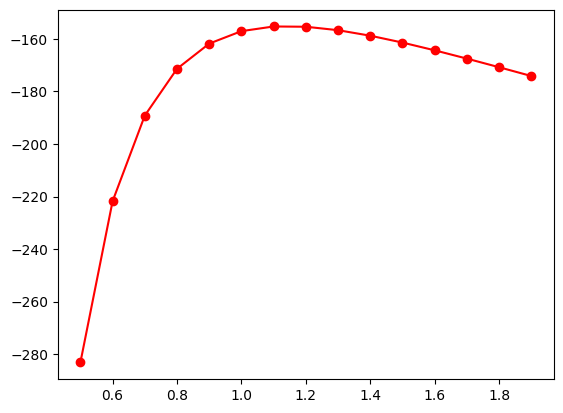

In [12]:
plt.plot(sigma_arr, likelihood_arr, color = 'red', marker = 'o')

В деяких випадках оцінки параметрів можна знайти аналітично. Зокрема, розглянемо вибірку отриману із нормального розподілу:

Нехай $ (x_1, ... , x_k) $ - значення, згенеровані із розподілу $ \xi \sim N(a, \sigma^2) $ . Розглянемо функцію правдоподібності для нормальної вибірки:

$ Likelihood(x_1, ... , x_k, a, \sigma^2)$ = $\prod_{i=1}^k \cfrac{1}{\sqrt{2 \pi \sigma^2}} exp ( - \cfrac{(x_k-a)^2}{2 \sigma^2} ) $

Її зазвичай зручніше записати у логарифмічній формі

$ logLikelihood(x_1, ... , x_k, a, \sigma^2)$ = $\sum_{i=1}^k (-\cfrac{log(2 \pi \sigma^2)}{2} - \cfrac{(x_k-a)^2}{2 \sigma^2} ) =  -\cfrac{klog(2 \pi \sigma^2)}{2} - \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2}$

Застосуємо обговорений вище "метод максимальної правдоподібності" :

$ -\cfrac{klog(2 \pi \sigma^2)}{2} - \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2} \rightarrow max_{a, \sigma}$

$ -\cfrac{klog(2 \pi)}{2} -\cfrac{klog(\sigma^2)}{2}- \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2} \rightarrow max_{a, \sigma}$

$ -\cfrac{klog(2 \pi)}{2} $ не залежить ні від a, ні від сігма, тому його можна прибрати із максимізації:

$ -\cfrac{klog(\sigma^2)}{2}- \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2} \rightarrow max_{a, \sigma}$

Виведемо оцінку для a, взявши похідну від функції правдоподібності

$ \cfrac{d(...)}{da} = \sum_{i=1}^k \cfrac{2(x_k-a)(-1)}{2 \sigma^2} = 0 $

$ \sum_{i=1}^k (a-x_k) = 0 $ 

$ \sum_{i=1}^k (x_k) = k a $

$ a = \cfrac{1}{k} \sum_{i=1}^k x_k $, що за своїм сенсом є середнім арифметичним вибірки

Порахуємо оцінку за вибіркою (очікуємо, що значення будуть близькі до нуля):

In [13]:
a_est = np.mean(sample)
a_est

0.07942926231212334

$ -\cfrac{klog(\sigma^2)}{2}- \sum_{i=1}^k \cfrac{(x_k-a)^2}{2 \sigma^2} \rightarrow max_{a, \sigma}$

Виведемо оцінку для $\sigma^2$, взявши похідну від функції правдоподібності

$ \cfrac{d(...)}{d\sigma^2} =  -\cfrac{k}{2\sigma^2} + \sum_{i=1}^k \cfrac{(x-a)^2}{2 \sigma^4} = 0$

скоротимо вираз на $ 2 \sigma^2 $

$ -k + \sum_{i=1}^k \cfrac{(x-a)^2}{\sigma^2} = 0 $

$ \sigma^2 = \cfrac{1}{k} \sum_{i=1}^k (x-a)^2 $ , що за фізичним сенсом є середньоквадратичним відхиленням.

Порахуємо оцінку за вибіркою (очікуємо, що значення будуть близькі до 0.9 або 1):

In [14]:
sigma_sq_est = ((sample - a)**2).mean()
sigma_sq_est

1.3029953346762044

In [15]:
np.sqrt(sigma_sq_est)

1.141488210484981